# 1. Install and import dependencies

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

First, we need to clone the ultralytics yolov5 model to our local system

In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


Installing the dependencies in the requirements file in the yolov5 folder. The dependencies in the requirement file include the following libraries: 
matplotlib>=3.2.2

numpy>=1.18.5

opencv-python>=4.1.2

Pillow>=7.1.2

PyYAML>=5.3.1

requests>=2.23.0

scipy>=1.4.1

torch>=1.7.0

torchvision>=0.8.1

tqdm>=4.41.0

In [6]:
!pip install -r requirements.txt

You should consider upgrading via the 'C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# 2. Load model
Loading the pre-trained ultralytics model from the torch hub.

The link for the torch hub model: https://pytorch.org/hub/ultralytics_yolov5/

Among the different Yolov5 model, we will be using the smaller version, namely Yolov5s for better performance and faster computations.

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\akash/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-2-19 torch 1.9.0 CUDA:0 (GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Making detections

In [17]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1280px-I-80_Eastshore_Fwy.jpg'

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 922x1280 35 cars, 2 trucks
Speed: 521.2ms pre-process, 32.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)


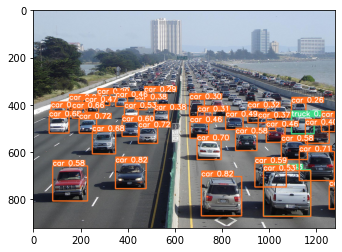

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Creating a custom dataset and Labelling
The custom dataset is as shown in the image folder of the repo. For this custom image dataset, labelling is done using the LabelImg repository from the github.

The link for the label image repo:https://github.com/tzutalin/labelImg

In [21]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [22]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Attempting uninstall: lxml
    Found existing installation: lxml 4.7.1
    Uninstalling lxml-4.7.1:
      Successfully uninstalled lxml-4.7.1


You should consider upgrading via the 'C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# 5. Training the custom dataset

In [24]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


The dataset.yml consists of all the classes used for this project.

In [25]:
!python train.py --img 320 --batch 5 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=5, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   4de8b24..a936f5f  master     -> origin/master
github:  YOLOv5 is out of date by 28 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.0-248-gcb2ad9f torch 1.10.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0,

    52/499        0G     0.071   0.01188  0.008963        15       320:  75%|#######5  | 6/8 [00:09<00:03,  1.86s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

    52/499        0G   0.07132   0.01181  0.008846        10       320:  75%|#######5  | 6/8 [00:12<00:03,  1.86s/it]
    52/499        0G   0.07132   0.01181  0.008846        10       320:  88%|########7 | 7/8 [00:12<00:02,  2.32s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

    97/499        0G   0.06792   0.01905   0.01279        18       320:   0%|          | 0/8 [00:03<?, ?it/s]
    97/499        0G   0.06792   0.01905   0.01279        18       320:  12%|#2        | 1/8 [00:03<00:26,  3.74s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA

   152/499        0G   0.05556   0.01289  0.007277         9       320:  62%|######2   | 5/8 [00:11<00:07,  2.50s/it]
   152/499        0G   0.05556   0.01289  0.007277         9       320:  75%|#######5  | 6/8 [00:11<00:03,  1.97s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   152/499        0G   0.05519   0.01266  0.007135        13       320:  75%|#######5  | 6/8 [00:16<00:03,  1.97s/it]
   152/499        0G   0.05519   0.01266  0.007135        13       320:  88%|########7 | 7/8 [00:16<00:02,  2.89s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:02<00:00,  1.92it/s]
                 all         40         40          1          1      0.995      0.817

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   211/499        0G   0.02184  0.006214  0.003429         8       320:   0%|          | 0/8 [00:03<?, ?it/s]
   211/499        0G   0.02184  0.006214  0.003429         8       320:  12%|#2        | 1/8 [00:03<00:26,  3.82s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalC

   274/499        0G   0.03451  0.008984  0.003918        11       320: 100%|##########| 8/8 [00:18<00:00,  2.16s/it]
   274/499        0G   0.03451  0.008984  0.003918        11       320: 100%|##########| 8/8 [00:18<00:00,  2.35s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/4 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 1/4 [00:00<00:01,  1.88it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 2/4 [00:00<00:00,  2.05it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:01<00:00,  1.62it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:02<00:00,  1.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|########


   332/499        0G   0.02158  0.007737   0.00266        11       320:  50%|#####     | 4/8 [00:10<00:06,  1.61s/it]
   332/499        0G   0.02158  0.007737   0.00266        11       320:  62%|######2   | 5/8 [00:10<00:06,  2.22s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   332/499        0G   0.02232   0.00763  0.002689        10       320:  62%|######2   | 5/8 [00:11<00:06,  2.22s/it]
   332/499        0G   0.02232   0.00763  0.002689        10       320:  75%|#######5  | 6/8 [00:11<00:03,  1.76s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: Use


   387/499        0G   0.01864  0.007605  0.003504        11       320:  88%|########7 | 7/8 [00:20<00:02,  2.97s/it]
   387/499        0G   0.01864  0.007605  0.003504        11       320: 100%|##########| 8/8 [00:20<00:00,  2.28s/it]
   387/499        0G   0.01864  0.007605  0.003504        11       320: 100%|##########| 8/8 [00:20<00:00,  2.53s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/4 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 1/4 [00:00<00:01,  1.87it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 2/4 [00:01<00:01,  1.67it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:02<00:00,  1.29it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:03<

                 all         40         40      0.999          1      0.995      0.935

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   449/499        0G   0.01484  0.009819  0.001922        15       320:   0%|          | 0/8 [00:03<?, ?it/s]
   449/499        0G   0.01484  0.009819  0.001922        15       320:  12%|#2        | 1/8 [00:03<00:25,  3.59s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is n

Command 'git fetch && git config --get remote.origin.url' returned non-zero exit status 1.
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 6. Load the custom model

In [26]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp11/weights/last.pt', force_reload=True)

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:05<00:00,  1.40s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:05<00:00,  1.39s/it]
                 all         40         40      0.127      0.325     0.0814      0.017

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

     7/499        0G    0.1009   0.01835   0.07169        11       320:   0%|          | 0/8 [00:04<?, ?it/s]
     7/499        0G    0.1009   0.01835   0.07169        11       320:  12%|

    52/499        0G   0.06789   0.01152  0.009347         9       320:  38%|###7      | 3/8 [00:07<00:09,  1.93s/it]
    52/499        0G   0.06789   0.01152  0.009347         9       320:  50%|#####     | 4/8 [00:07<00:08,  2.03s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

    52/499        0G   0.06957   0.01139  0.008775        10       320:  50%|#####     | 4/8 [00:10<00:08,  2.03s/it]
    52/499        0G   0.06957   0.01139  0.008775        10       320:  62%|######2   | 5/8 [00:10<00:06,  2.27s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User

    55/499        0G   0.05252   0.01112  0.006602        12       320:  25%|##5       | 2/8 [00:03<00:11,  1.89s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

    55/499        0G   0.05358   0.01031  0.006492         7       320:  25%|##5       | 2/8 [00:05<00:11,  1.89s/it]
    55/499        0G   0.05358   0.01031  0.006492         7       320:  38%|###7      | 3/8 [00:05<00:09,  1.84s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'

  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   106/499        0G   0.08096   0.00996  0.008263        12       320:  38%|###7      | 3/8 [00:05<00:07,  1.40s/it]
   106/499        0G   0.08096   0.00996  0.008263        12       320:  50%|#####     | 4/8 [00:05<00:05,  1.33s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   106/499        0G   0.07962   0.01009  0.008115        11       320:  50%|#####     | 4/8 [00:07<00:05,  1.33s/it]
   106/499        0G   0.07962   0.01009  0.008115        11       320:  62%|######2   | 5/8 [00:07<00:04,  1.45s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p


   108/499        0G    0.0685   0.01324    0.0105        12       320:  38%|###7      | 3/8 [00:05<00:06,  1.33s/it]
   108/499        0G    0.0685   0.01324    0.0105        12       320:  50%|#####     | 4/8 [00:05<00:05,  1.30s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   108/499        0G   0.06814   0.01283  0.009996        13       320:  50%|#####     | 4/8 [00:07<00:05,  1.30s/it]
   108/499        0G   0.06814   0.01283  0.009996        13       320:  62%|######2   | 5/8 [00:07<00:04,  1.62s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: Use

  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   113/499        0G   0.06195   0.01292  0.009798        11       320:  88%|########7 | 7/8 [00:15<00:02,  2.29s/it]
   113/499        0G   0.06195   0.01292  0.009798        11       320: 100%|##########| 8/8 [00:15<00:00,  2.10s/it]
   113/499        0G   0.06195   0.01292  0.009798        11       320: 100%|##########| 8/8 [00:15<00:00,  1.97s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/4 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 1/4 [00:00<00:02,  1.20it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 2/4 [00:04<00:05,  2.75s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:09<00:03,  3.68s/it]
               Class 


   174/499        0G   0.04598   0.01087   0.00916        13       320:  88%|########7 | 7/8 [00:18<00:02,  2.10s/it]
   174/499        0G   0.04598   0.01087   0.00916        13       320: 100%|##########| 8/8 [00:18<00:00,  2.74s/it]
   174/499        0G   0.04598   0.01087   0.00916        13       320: 100%|##########| 8/8 [00:18<00:00,  2.28s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/4 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 1/4 [00:00<00:02,  1.33it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 2/4 [00:02<00:02,  1.05s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:04<00:01,  1.74s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:07<

   178/499        0G   0.04225   0.01182  0.008984        11       320:  88%|########7 | 7/8 [00:12<00:02,  2.18s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   178/499        0G   0.04185   0.01214  0.008616        16       320:  88%|########7 | 7/8 [00:14<00:02,  2.18s/it]
   178/499        0G   0.04185   0.01214  0.008616        16       320: 100%|##########| 8/8 [00:14<00:00,  2.32s/it]
   178/499        0G   0.04185   0.01214  0.008616        16       320: 100%|##########| 8/8 [00:14<00:00,  1.84s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/4 [00:00<?, ?it/s]
               Class     Images     Labels          P 

   238/499        0G   0.03056    0.0101  0.004601        12       320: 100%|##########| 8/8 [00:18<00:00,  2.83s/it]
   238/499        0G   0.03056    0.0101  0.004601        12       320: 100%|##########| 8/8 [00:18<00:00,  2.34s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/4 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 1/4 [00:02<00:07,  2.45s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 2/4 [00:03<00:02,  1.48s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:03<00:01,  1.02s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:04<00:00,  1.24it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|########

   247/499        0G   0.03165  0.009897  0.003898        13       320:  12%|#2        | 1/8 [00:02<00:05,  1.17it/s]
   247/499        0G   0.03165  0.009897  0.003898        13       320:  25%|##5       | 2/8 [00:02<00:07,  1.20s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   247/499        0G   0.03112  0.009246  0.004214         9       320:  25%|##5       | 2/8 [00:04<00:07,  1.20s/it]
   247/499        0G   0.03112  0.009246  0.004214         9       320:  38%|###7      | 3/8 [00:04<00:08,  1.77s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:03<00:01,  1.21s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:04<00:00,  1.07s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:04<00:00,  1.09s/it]
                 all         40         40      0.996          1      0.995      0.735

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   297/499        0G   0.02233  0.009811  0.002838   


   305/499        0G   0.02524  0.007952  0.002683        11       320:  12%|#2        | 1/8 [00:02<00:09,  1.36s/it]
   305/499        0G   0.02524  0.007952  0.002683        11       320:  25%|##5       | 2/8 [00:02<00:08,  1.48s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   305/499        0G   0.02333  0.008478  0.002678        11       320:  25%|##5       | 2/8 [00:04<00:08,  1.48s/it]
   305/499        0G   0.02333  0.008478  0.002678        11       320:  38%|###7      | 3/8 [00:04<00:06,  1.38s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: Use

   349/499        0G   0.02033  0.008579   0.00385        16       320:  75%|#######5  | 6/8 [00:09<00:03,  1.77s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   349/499        0G   0.02186  0.008294  0.003686        10       320:  75%|#######5  | 6/8 [00:15<00:03,  1.77s/it]
   349/499        0G   0.02186  0.008294  0.003686        10       320:  88%|########7 | 7/8 [00:15<00:02,  2.97s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'

   352/499        0G   0.02495  0.008704  0.002782        15       320:  50%|#####     | 4/8 [00:05<00:05,  1.49s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   352/499        0G   0.02471  0.008624  0.002725        11       320:  50%|#####     | 4/8 [00:10<00:05,  1.49s/it]
   352/499        0G   0.02471  0.008624  0.002725        11       320:  62%|######2   | 5/8 [00:10<00:07,  2.49s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'

   403/499        0G   0.02176  0.008035   0.00333        10       320:  12%|#2        | 1/8 [00:02<00:07,  1.00s/it]
   403/499        0G   0.02176  0.008035   0.00333        10       320:  25%|##5       | 2/8 [00:02<00:06,  1.04s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   403/499        0G   0.02029  0.007361  0.003619        10       320:  25%|##5       | 2/8 [00:06<00:06,  1.04s/it]
   403/499        0G   0.02029  0.007361  0.003619        10       320:  38%|###7      | 3/8 [00:06<00:13,  2.72s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 1/4 [00:00<00:02,  1.23it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 2/4 [00:01<00:01,  1.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:02<00:00,  1.16it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:04<00:00,  1.23s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:04<00:00,  1.09s/it]
                 all         40         40      0.999          1      0.995      0.863

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packa

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/4 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 1/4 [00:00<00:02,  1.45it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 2/4 [00:01<00:01,  1.23it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 3/4 [00:02<00:00,  1.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:03<00:00,  1.20it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 4/4 [00:03<00:00,  1.22it/s]
                 all         40         40      0.999          1      0.995      0.943

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/8 [00:00<?, ?it/s]C:\User


  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   480/499        0G  0.008083  0.003666  0.001371         7       320:   0%|          | 0/8 [00:03<?, ?it/s]
   480/499        0G  0.008083  0.003666  0.001371         7       320:  12%|#2        | 1/8 [00:03<00:27,  3.96s/it]C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

   480/499        0G   0.01091  0.00598

YOLOv5  2022-2-21 torch 1.9.0 CUDA:0 (GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [41]:
import os
img = os.path.join('data_scrap', 'test', 'mm.jpeg')

In [42]:
results = model(img)

In [43]:
results.print()

image 1/1: 1500x2000 2 not scraps, 2 scraps
Speed: 62.8ms pre-process, 26.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


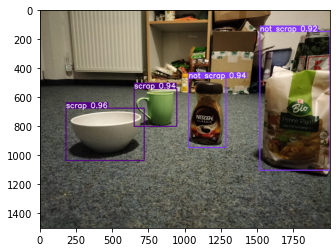

In [44]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [45]:
results.show()

In [46]:
cap = cv2.VideoCapture("./data_scrap/test/kk.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

